LOGISTIC REGRESSION

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

data = pd.read_csv('balanced_augmented_thesis_data.csv')

# Display the first few rows to verify the data is loaded
print(data.head())

# Drop unnecessary columns
columns_to_drop = ['Patient Initials', 'Comorbidities', 
                   'History of hypertensive crisis', 'Height (in cm)', 'Unnamed: 11', 'Unnamed: 12', 'round WHtR', 'round waist-hip ratio',
                   'SBP1', 'SBP2', 'SBP3', 'DBP1', 'DBP2', 'DBP3']
data = data.drop(columns=columns_to_drop)

# Create target variable
data['Hypertensive'] = ((data['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive)'] == 'H') | 
                       ((data['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'] == 'H')).astype(int))

# Drop original classification columns
data = data.drop(columns=['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive)', 
                          'According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'])

# Define 'Family history of hypertension' as the sole feature
features = ['Family history of hypertension']
X = data[features]
y = data['Hypertensive']

# Handle missing values and encode categorical variables
# Create a preprocessing pipeline for categorical features
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values for categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    # One-hot encode the categorical feature
])

# Transform the feature data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Print results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importances
importances = model.coef_[0]
feature_names = preprocessor.named_steps['onehot'].get_feature_names_out(features)
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': abs(importances)})

print("\nFeature Importance:")
print(feature_importance)


   Serial number Patient Initials Gender  Age (years) Comorbidities  \
0            1.0               AC      M          6.0             N   
1           26.0               MA      M          6.0             N   
2           62.0               AN      M          6.0             N   
3           82.0              HNN      M          6.0             N   
4          102.0              TRE      M          6.0             N   

  Family history of hypertension History of hypertensive crisis  Weight (Kg)  \
0                              Y                              N         28.0   
1                              N                              N         20.0   
2                              N                              N         27.0   
3                              N                              N         27.0   
4                              N                              N         27.0   

   Height (metre)  Height (in cm)  ...   SBP3 Mean SBP (not rounded)  \
0            1.15   

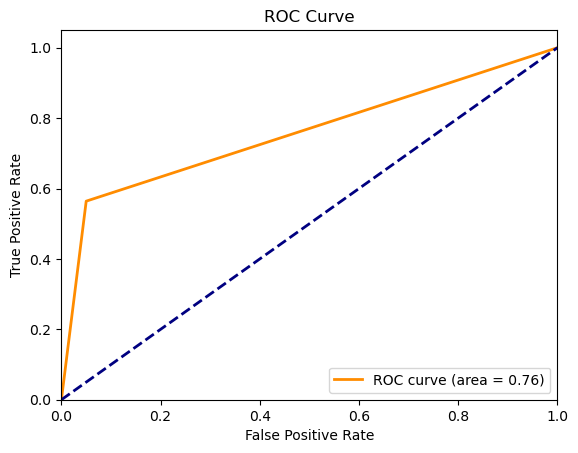

AUC Score: 0.7570512820512819


In [5]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print("AUC Score:", auc_score)


RANDOM FOREST


Confusion Matrix (Random Forest):
[[76  4]
 [17 22]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

       False       0.82      0.95      0.88        80
        True       0.85      0.56      0.68        39

    accuracy                           0.82       119
   macro avg       0.83      0.76      0.78       119
weighted avg       0.83      0.82      0.81       119



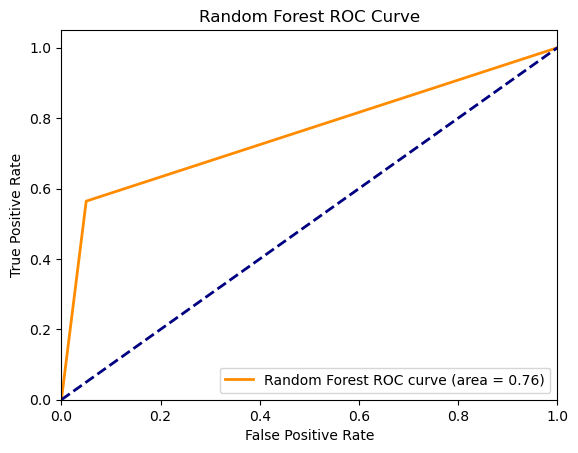

Random Forest Accuracy: 0.8235294117647058
Random Forest AUC Score: 0.7570512820512819


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train a Random Forest model using 'Family history of hypertension' as the feature
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the confusion matrix
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

# Print the classification report (includes precision, recall, and F1-score)
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Get the predicted probabilities for the positive class (required for ROC curve)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)

# Calculate AUC score
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Plot the ROC curve for Random Forest
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest ROC curve (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print additional metrics
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest AUC Score:", auc_rf)


SVM

Confusion Matrix (SVM):
[[76  4]
 [17 22]]

Classification Report (SVM):
              precision    recall  f1-score   support

       False       0.82      0.95      0.88        80
        True       0.85      0.56      0.68        39

    accuracy                           0.82       119
   macro avg       0.83      0.76      0.78       119
weighted avg       0.83      0.82      0.81       119



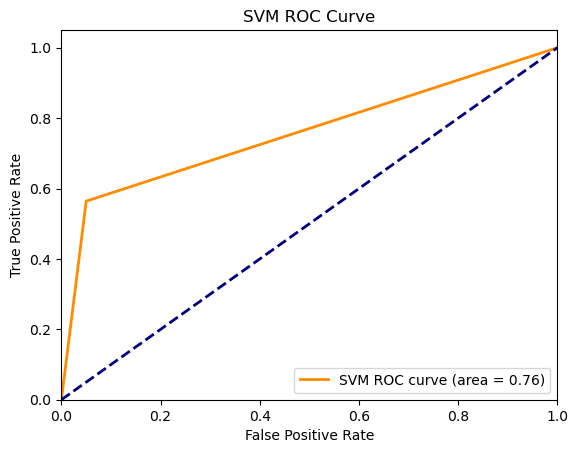

SVM Accuracy: 0.8235294117647058
SVM AUC Score: 0.7570512820512819


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train an SVM model using 'Family history of hypertension' as the feature
# Use the 'probability=True' argument to enable probability estimates
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the confusion matrix
print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))

# Print classification report (including precision, recall, F1-score)
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

# Get the predicted probabilities for the positive class (required for ROC curve)
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)

# Calculate AUC score
auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

# Plot the ROC curve for SVM
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='SVM ROC curve (area = %0.2f)' % auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print additional metrics
print("SVM Accuracy:", accuracy_svm)
print("SVM AUC Score:", auc_svm)


GRADIENT BOOSTING

Confusion Matrix (Gradient Boosting):
[[76  4]
 [17 22]]

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

       False       0.82      0.95      0.88        80
        True       0.85      0.56      0.68        39

    accuracy                           0.82       119
   macro avg       0.83      0.76      0.78       119
weighted avg       0.83      0.82      0.81       119



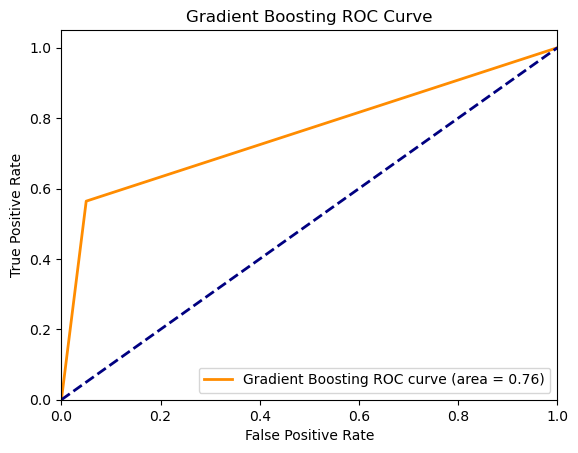

Gradient Boosting Accuracy: 0.8235294117647058
Gradient Boosting AUC Score: 0.7570512820512819


In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train a Gradient Boosting model using 'Family history of hypertension' as the feature
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Print the confusion matrix
print("Confusion Matrix (Gradient Boosting):")
print(confusion_matrix(y_test, y_pred_gb))

# Print classification report (including precision, recall, F1-score)
print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))

# Get the predicted probabilities for the positive class (required for ROC curve)
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)

# Calculate AUC score
auc_gb = roc_auc_score(y_test, y_pred_prob_gb)

# Plot the ROC curve for Gradient Boosting
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='Gradient Boosting ROC curve (area = %0.2f)' % auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print additional metrics
print("Gradient Boosting Accuracy:", accuracy_gb)
print("Gradient Boosting AUC Score:", auc_gb)


XGB CLASSIFIER

Confusion Matrix (XGBoost):
[[76  4]
 [17 22]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

       False       0.82      0.95      0.88        80
        True       0.85      0.56      0.68        39

    accuracy                           0.82       119
   macro avg       0.83      0.76      0.78       119
weighted avg       0.83      0.82      0.81       119



C:\Users\BIGDATA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:44:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


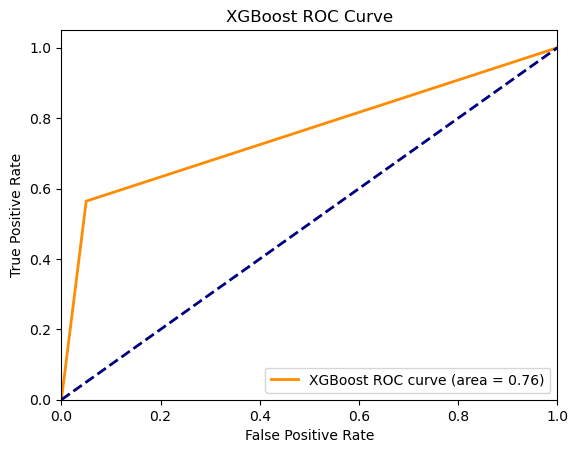

XGBoost Accuracy: 0.8235294117647058
XGBoost AUC Score: 0.7570512820512819


In [13]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train an XGBoost model using 'Family history of hypertension' as the feature
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print the confusion matrix
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

# Print classification report (including precision, recall, F1-score)
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Get the predicted probabilities for the positive class (required for ROC curve)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)

# Calculate AUC score
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

# Plot the ROC curve for XGBoost
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='XGBoost ROC curve (area = %0.2f)' % auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print additional metrics
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost AUC Score:", auc_xgb)
